In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Rengarajan\DataScience\ML_Algorithms\Linear_Regression\economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
#drop unnecessary columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
#checking null value
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [6]:
#check the corelation
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


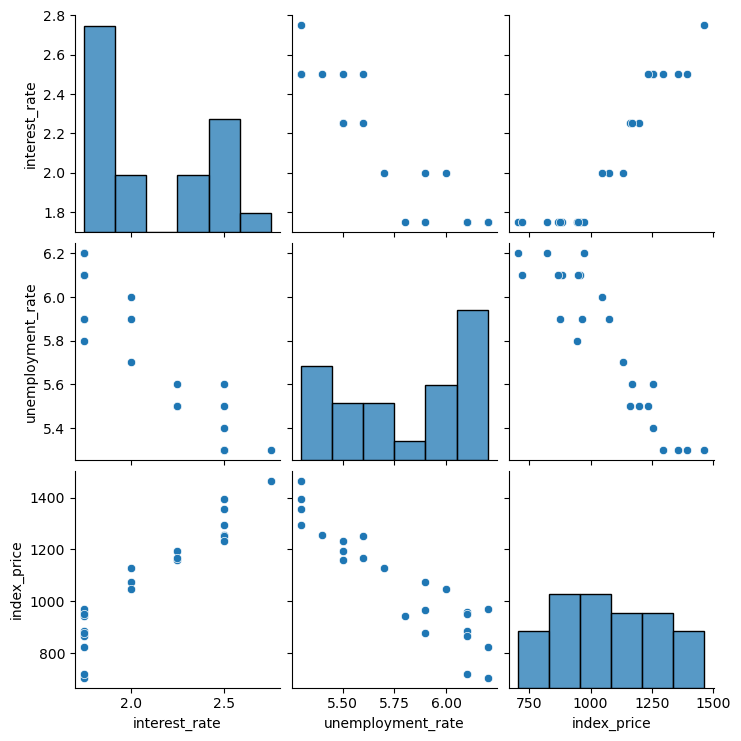

In [7]:
#visualizing relationship 
sns.pairplot(df)

Text(0, 0.5, 'unemployment rate')

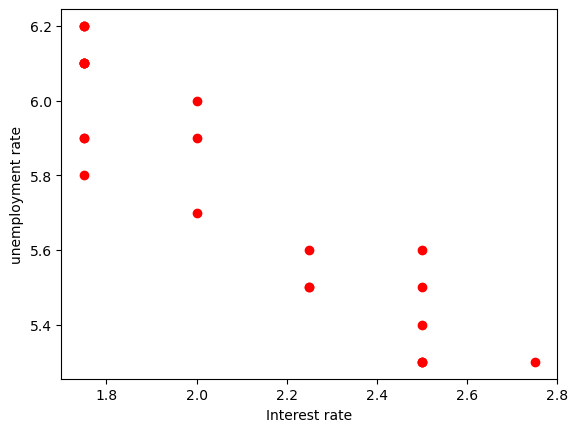

In [8]:
#Visualiza the datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [9]:
#Independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

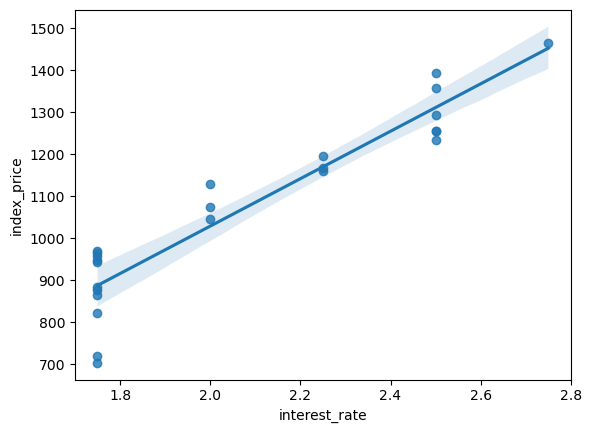

In [11]:
#plot regression plot
sns.regplot(x='interest_rate',y='index_price',data=df)

In [12]:
#train a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
#cross validation - it return 5 val score
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
validation_score

array([-1606.47408206, -9579.95329208, -7961.60935985, -8392.32547433,
        -773.2668524 ])

In [15]:
np.mean(validation_score)

-5662.725812144463

In [16]:
#prediction
y_pred=model.predict(X_test)

In [17]:
y_pred

array([1204.14403741,  821.62603274, 1406.38534684,  857.68137178,
        994.85736555])

In [21]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6957.105303258848
71.71878409976634
83.40926389351993


In [22]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8254940547158571


In [23]:
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.6509881094317143


In [24]:
#prediction for interest_rate=3 & unemployment_rate=5
model.predict([[3,5]])

C:\Users\Rengarajan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1579.61667966])

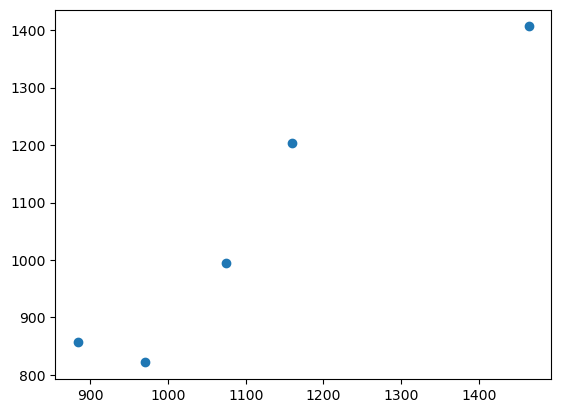

In [25]:
#assumptions
plt.scatter(y_test,y_pred)

In [26]:
#errors
residuals=y_test-y_pred
print(residuals)

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64


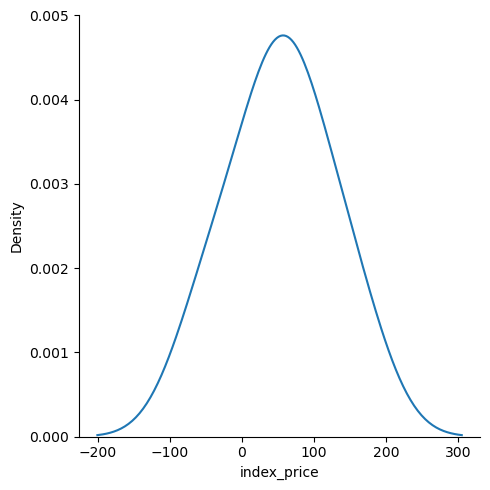

In [27]:
#Plot this residuals
sns.displot(residuals,kind='kde')

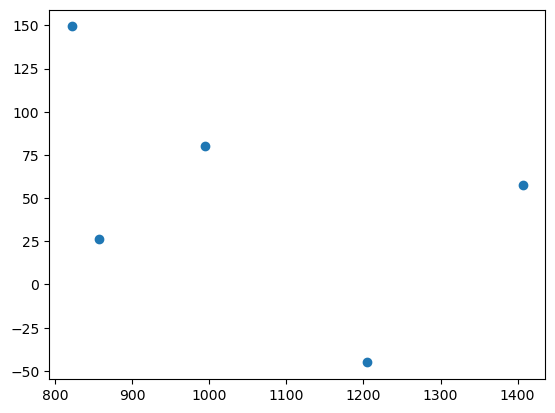

In [28]:
#scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)